# Polinomio de hermite

Primero vamos a importar las librerias necesarias para desarrollar los calculos

In [1]:
using SymPy
using Plots
using DelimitedFiles

Primero definimos cual va a ser nuestra `variable simboloca`, que la definiremos como x

SymPy para el `manejo simbolico de las funciones` que en nuestro caso sera un polinomio 

In [4]:
x = Sym("x")



x

Ahora declaramos una funcion que aplique el `metodo de diferencias dividas`, el cual nos permitira sacar el valor de cada coefieciente del polinomio

In [3]:
function diferencia(x, y, yp)
    n = length(x) #sacamos el numero de valores
    #definimos los arreglos
    z = Array{Float64}(undef, 2*n)
    Q = Array{Float64}(undef, 2*n, 2*n)
    d = Array{Float64}(undef, 2*n)
    for i in 0:(n-1)
        #Hacemos el calculo de los coeficientes
        z[2*i + 1] = x[i+1]
        z[2*i + 2] = x[i+1]
        Q[2*i+1,1] = y[i+1]
        Q[2*i+2, 1] = y[i+1]
        Q[2*i+2, 2] = yp[i+1]
        if i != 0
            Q[2*i+1,2] = (Q[2*i+1,1] - Q[2*i,1])/(z[2*i+1] - z[2*i])

        end
    end
    
    #Aqui calculamos cada coeficiente del polinomio
    for i in 2:(2*(n-1)+1)
        for j in 2:i
            f = Q[i+1,j] - Q[i,j] #Numerador
            g = z[i+1] - z[i-j+1] #Denominador 
            Q[i+1,j+1] = f/g
        end
        d = [Q[i, i] for i in 1:2*n]
    end
    return [z,d]
end

diferencia (generic function with 1 method)

Declaramos una funcion que arme el `polinimo de forma simbolica` con nuestra variable x

In [5]:
function polhernitesyn(diff , z)
    n = length(z) - 1
    pol = diff[n+1]
    for k in 1:n
        pol = diff[n-k+1] + (x-z[n-k+1])*pol
    end
    return pol
end

polhernitesyn (generic function with 1 method)

Luego `extraemos` los datos del archivo que contiene las temperaturas

In [7]:
#Extraemos los datos del archivo
archivo_csv = "Datos.csv"
datos = readdlm(archivo_csv, ',', header=false)
datos_y = datos[1, :] # Estos son los valores de las temparaturas

7-element Vector{Float64}:
 27.79
 27.93
 25.47
 26.55
 28.42
 26.9
 28.36

Tomamos los valores de x como los dias de la `semana enumerados`, es decir,

Lunes = 1

Martes = 2

Miercoles = 3

Jueves = 4

Viernes = 5

Sabado = 6 

Domingo = 7

In [8]:
datos_x = [1,2,3,4,5,6,7] # Los dias de la semana los enumeramos


7-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
 7

Simulamos las `derivadas` en cada punto, como la `diferencia` de temperaturas entre los dias

In [11]:
#simulamos las derivadas
derivadas = []
suma = 0

for i in 1:length(datos_y)
    if i != length(datos_y)
        push!(derivadas,datos_y[i+1] - datos_y[i])
        suma += abs(derivadas[i])
    else
        push!(derivadas,suma/length(datos_y))
    end
end
derivadas

7-element Vector{Any}:
  0.14000000000000057
 -2.460000000000001
  1.0800000000000018
  1.870000000000001
 -1.5200000000000031
  1.4600000000000009
  1.2185714285714297

Ahora llamamos a las `funciones` para que armen el polinomio con estos datos y lo muestre por `pantalla expandido`

In [12]:
d = diferencia(datos_x , datos_y , derivadas)
diff = d[2]
polinomio = polhernitesyn(diff , d[1])
println("El polinomio interpolador de Hermite es: \n")
println(expand(polinomio))

El polinomio interpolador de Hermite es: 

-0.000130473434744269*x^13 + 0.00557250771604943*x^12 - 0.0999680979938283*x^11 + 0.936242399691374*x^10 - 4.12110003472237*x^9 - 4.62495516203613*x^8 + 174.839978466156*x^7 - 1127.55699579474*x^6 + 4094.61833935954*x^5 - 9461.34637506168*x^4 + 14109.0243093518*x^3 - 13086.8204888888*x^2 + 6826.22557142855*x - 1493.29


Ahora para graficar el polinimio, definimos una funcion que `evalue` el polinomio para ciertos valores de x

In [14]:
function evaluar_hermite(pol, x_vals)
    y_vals = [pol.subs(x, xi) for xi in x_vals]
    return y_vals
end

evaluar_hermite (generic function with 1 method)

Definimos el `intervalo` en el cual se va a evualar el polinomio, el cual estara delimitado por el primer y ultimo dia de la semana, y `fragmentado en 100 puntos uniformemente espaciados`

In [15]:
valores_x = range(datos_x[1], stop=datos_x[length(datos_x)], length=100)
valores_x = collect(valores_x)

100-element Vector{Float64}:
 1.0
 1.0606060606060606
 1.121212121212121
 1.1818181818181819
 1.2424242424242424
 1.303030303030303
 1.3636363636363635
 1.4242424242424243
 1.4848484848484849
 1.5454545454545454
 1.606060606060606
 1.6666666666666667
 1.7272727272727273
 ⋮
 6.333333333333333
 6.393939393939394
 6.454545454545454
 6.515151515151516
 6.575757575757576
 6.636363636363637
 6.696969696969697
 6.757575757575758
 6.818181818181818
 6.878787878787879
 6.9393939393939394
 7.0

`Evaluamos` el polinomio en estos puntos y lo almacenamos en una lista

In [17]:
valores_y = evaluar_hermite(polinomio, valores_x)


100-element Vector{Sym{PyCall.PyObject}}:
 27.7900000000000
 27.6168102971786
 27.2552511912641
 26.8884827563139
 26.6172564251467
 26.4842007037331
 26.4929807716055
 26.6231162245748
 26.8411588437205
 27.1088545714957
 27.3888409533564
 27.6483632262412
 27.8614290252214
                ⋮
 27.1027678467625
 27.0346427532334
 26.9432688333674
 26.8476885125083
 26.7744370912344
 26.7554039776054
 26.8234358073113
 27.0048710631716
 27.3080193446979
 27.7063960888173
 28.1152927059514
 28.3600000000032

Ahora con la libreria `plot`, graficamos cada par el cual representara la curva del polinomio y añadimos los datos empiricos para comparar

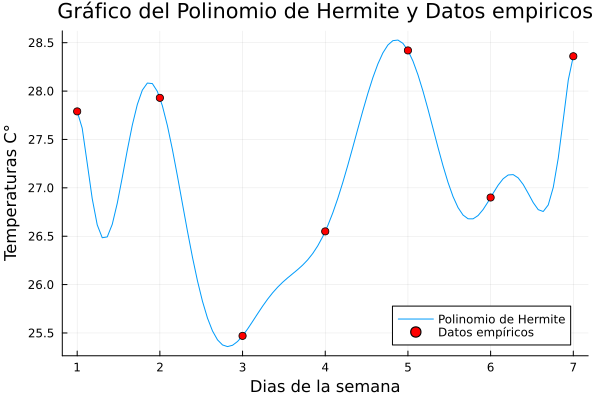

In [18]:
p = plot(valores_x, valores_y, label="Polinomio de Hermite", xlabel="Dias de la semana", ylabel="Temperaturas C°", title="Gráfico del Polinomio de Hermite y Datos empiricos")

scatter!(p, datos_x, datos_y, label="Datos empíricos", color=:red)
display(p)